# Processing Images and Videos - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 3
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Alex Costanzino, alex.costanzino@unibo.it

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linear_stretching(img, max_value, min_value):
    img[img<min_value] = min_value
    img[img>max_value] = max_value
    linear_stretched_img = 255./(max_value-min_value)*(img-min_value)
    print("Output image type: ", linear_stretched_img.dtype)
    return linear_stretched_img


def find_percentile_value(hist, percentile):
    s = 0
    idx = 0
    total_pixel = np.sum(hist)
    while(s < total_pixel*percentile/100):
        s += hist[idx]
        idx += 1
    return idx

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before stretching
plt.title("Hist Before Stretching")
plt.stem(hist, use_line_collection=True)
plt.show()

# Stretching with max and min of the image. Not effective because of outliers.
max_value = np.max(img)
min_value = np.min(img)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st, use_line_collection=True)
plt.show()

# Stretching with fixed max and min.
max_value = 40
min_value = 0
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st, use_line_collection=True)
plt.show()

# Stretching with dynamic max and min based on percentiles.
max_value = find_percentile_value(hist, 95)
min_value = find_percentile_value(hist, 5)
print("Max 95%: ", max_value, " Min 5%: ", min_value)
linear_stretched_img=linear_stretching(np.copy(img), max_value,min_value)
hist_st,bins = np.histogram(linear_stretched_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(linear_stretched_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Stretching")
plt.stem(hist_st, use_line_collection=True)
plt.show()

## Exercise 2: Mean Filter
Apply a mean filter of kernel size 9x9 to an image.

Test it on the __grayscale__ image "ex/landscape.jpg".

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

k_size = 9
mean_kernel = np.ones([k_size,k_size])/(k_size**2)

img_tr = cv2.filter2D(img,-1,mean_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 3: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

denoising_kernel = np.array([
            [1,2,1],
            [2,4,2],
            [1,2,1]])/16

img_tr = cv2.filter2D(img,-1,denoising_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

high_pass_kernel = np.array([
            [0,1,0],
            [1,-4,1],
            [0,1,0]])

img_tr = cv2.filter2D(img.astype(float),-1,high_pass_kernel)
img_tr = np.abs(img_tr)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 4: Gaussian Filter

Apply a 2D gaussian filter with $\sigma=1.5$ to an image.

Do it twice:
* Finding the gaussian kernel and applying it.  
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the __grayscale__ image "ex/landscape.jpg".

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time # Library to compute timings

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Higher sigmas should correspond to larger kernels. usually big as 
sigma = 1.5
k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
print("Sigma: {}, Kernel Size: {}".format(sigma, k_size))

# Finding the gaussian kernel 1D 11x1
gaussian_kernel_1D = cv2.getGaussianKernel(k_size, sigma)

start = time.time()
img_tr1 = cv2.filter2D(img,-1,gaussian_kernel_1D)
img_tr = cv2.filter2D(img_tr1,-1,gaussian_kernel_1D.transpose())
print("Time needed twice 1D: ", time.time()-start)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding the gaussian kernel 2D 11x11
gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())

start = time.time()
# Applying the kernel
img_tr = cv2.filter2D(img,-1,gaussian_kernel_2D)
print("Time needed single 2D (SLOWER): ", time.time()-start)

# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

# Using OpenCV function GaussianBlur
start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size,k_size) , sigma)
print("Time needed with OpenCV API (Best Optimization): ", time.time()-start)
# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 5: Bilateral Filter
Apply a bilateral filter with filter size of 9x9 and both sigma values of 75. 

Test it on the __grayscale__ image "ex/landscape.jpg".

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

img_bilateral = cv2.bilateralFilter(img,9,75,75)
# Plot the result
plt.imshow(img_bilateral,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 6: Exponential Operator

It is sometimes desirable to selectively enhance the contrast in either dark (under-exposed) or bright (over-exposed) areas of the image. Linear stretching, though, would expand the contrast uniformly. However, a non-linear mapping, such as the Exponential Operator, can be deployed:

<img src="LabSession3Images/exp_op.png" width="320">

Thus, taking $r<1$ would stretch the intensity dynamics of dark areas and shrink that of bright ones, which turns out effective to improve under-exposed images. The opposite behaviour is achieved with $r>1$, which therefore can be used to enhance over-exposed images.

The operator is also known as __gamma correction__, due to its widespread use to compensate for the exponential voltage-to-intensity mapping ($I=V^r$) of old CRT monitors (often  $r=2.2$, i.e. darkening), which can be compensated by brightening  the image ($r'=\frac{1}{r}=0.45$) before displaying. 

Given an exponent $r$, $P_{out}$ the output pixel value and $P_{in}$ the input pixel value, the formula for the exponential operator is the following:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Implement an exponential operator using as $r=0.45$.
Test the function on the __grayscale__ image "ex/image.png".
Plot the histogram of the image before and after the transformation.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

def exponential_operator(img, r):
    exp_img = ((img/255)**r) *255
    return exp_img
    
# Extracting the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])

# Plotting the histogram before operator
plt.title("Hist Before Stretching")
plt.stem(hist, use_line_collection=True)
plt.show()

exp_img = exponential_operator(img, 0.45)
hist_st,bins = np.histogram(exp_img.astype(np.uint8).flatten(),256,[0,256])
plt.imshow(exp_img,cmap='gray',vmin=0,vmax=255)
plt.show()
plt.title("Hist After Operator")
plt.stem(hist_st, use_line_collection=True)
plt.show()

## Exercise 7: Video Processing

Apply one or more of the previous operators on each frame of the video with path 'ex/1.avi'.

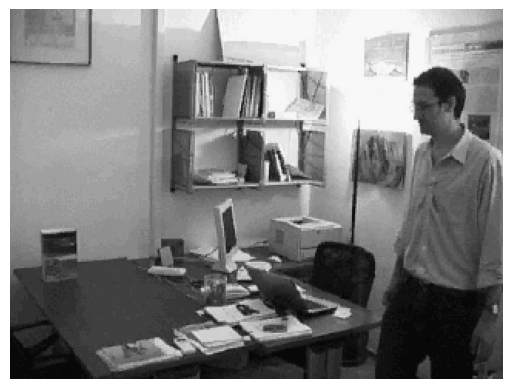

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

# Loading video
cap = cv2.VideoCapture('ex/1.avi')
try:
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret and not frame is None:
            frame = frame.astype(float)
            # Insert your operations on the frame here
            
            ###########################
            # Display the frame
            frame = frame.astype(np.uint8)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.imshow(frame)
            plt.show()
            clear_output(wait=True)
        else:
            break
    cap.release()
except KeyboardInterrupt:
    # If we press top release the video
    cap.release()
    print("Released Video Resource")